<a href="https://colab.research.google.com/github/EG-L/kaggle/blob/main/wineq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/winequality/wine-quality-pred.zip

Archive:  /content/drive/MyDrive/winequality/wine-quality-pred.zip
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [4]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [5]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,9
1,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,11
2,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,14
3,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,15
4,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,17
...,...,...,...,...,...,...,...,...,...,...,...,...
451,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,1585
452,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,1588
453,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,1589
454,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1596


In [6]:
np.unique(train['quality'],return_counts=True)

(array([3, 4, 5, 6, 7, 8]), array([  6,  33, 483, 462, 143,  16]))

In [7]:
train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train['quality'] = le.fit_transform(train['quality'])

In [13]:
X = train.drop(['Id','quality'],axis=1)
y = train['quality']

In [14]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [15]:
y

0       2
1       2
2       2
3       3
4       2
       ..
1138    3
1139    3
1140    2
1141    3
1142    2
Name: quality, Length: 1143, dtype: int64

In [16]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
print(X_train.shape,y_train.shape)

(857, 11) (857,)


In [20]:
print(X_test.shape,y_test.shape)

(286, 11) (286,)


In [21]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([  6,  26, 362, 341, 109,  13]))

In [22]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(11,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 102       
Total params: 12,502
Trainable params: 12,502
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300)

Epoch 1/300
27/27 [==============================] - 1s 9ms/step - loss: 1.6923 - accuracy: 0.3197 - val_loss: 1.4627 - val_accuracy: 0.4371
Epoch 2/300
27/27 [==============================] - 0s 3ms/step - loss: 1.3397 - accuracy: 0.4667 - val_loss: 1.1302 - val_accuracy: 0.6084
Epoch 3/300
27/27 [==============================] - 0s 3ms/step - loss: 1.1157 - accuracy: 0.5729 - val_loss: 0.9903 - val_accuracy: 0.6224
Epoch 4/300
27/27 [==============================] - 0s 3ms/step - loss: 1.0236 - accuracy: 0.5904 - val_loss: 0.9452 - val_accuracy: 0.6154
Epoch 5/300
27/27 [==============================] - 0s 3ms/step - loss: 0.9866 - accuracy: 0.6114 - val_loss: 0.9195 - val_accuracy: 0.6119
Epoch 6/300
27/27 [==============================] - 0s 4ms/step - loss: 0.9592 - accuracy: 0.6021 - val_loss: 0.9097 - val_accuracy: 0.6119
Epoch 7/300
27/27 [==============================] - 0s 3ms/step - loss: 0.9281 - accuracy: 0.6231 - val_loss: 0.9002 - val_accuracy: 0.6329
Epoch 8/300
2

In [25]:
import matplotlib.pyplot as plt

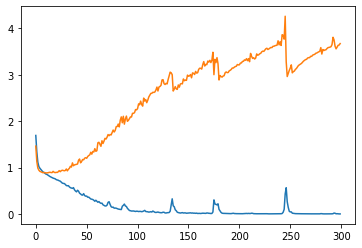

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

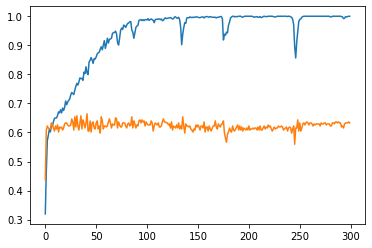

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [44]:
from keras import regularizers
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(11,),kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(8,activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(6,activation='softmax'))

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               1536      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)               

In [46]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300)

Epoch 1/300
27/27 [==============================] - 1s 12ms/step - loss: 3.6322 - accuracy: 0.3279 - val_loss: 3.3178 - val_accuracy: 0.4301
Epoch 2/300
27/27 [==============================] - 0s 3ms/step - loss: 3.0898 - accuracy: 0.4201 - val_loss: 2.8356 - val_accuracy: 0.4231
Epoch 3/300
27/27 [==============================] - 0s 4ms/step - loss: 2.6497 - accuracy: 0.3839 - val_loss: 2.4225 - val_accuracy: 0.4231
Epoch 4/300
27/27 [==============================] - 0s 4ms/step - loss: 2.2663 - accuracy: 0.4072 - val_loss: 2.0491 - val_accuracy: 0.4231
Epoch 5/300
27/27 [==============================] - 0s 4ms/step - loss: 1.9680 - accuracy: 0.4107 - val_loss: 1.7923 - val_accuracy: 0.4231
Epoch 6/300
27/27 [==============================] - 0s 4ms/step - loss: 1.7752 - accuracy: 0.4259 - val_loss: 1.6279 - val_accuracy: 0.4231
Epoch 7/300
27/27 [==============================] - 0s 4ms/step - loss: 1.6483 - accuracy: 0.4294 - val_loss: 1.5294 - val_accuracy: 0.4231
Epoch 8/300


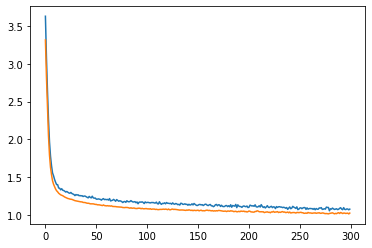

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

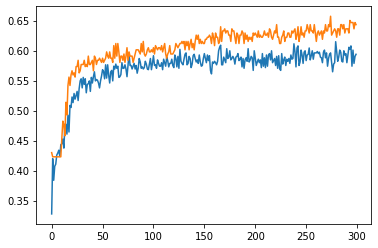

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [49]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1.0215 - accuracy: 0.6434


[1.0215400457382202, 0.6433566212654114]